In [ ]:
!pip install scikeras
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

import numpy as np
from numpy import nan as NA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.model_selection import learning_curve, StratifiedKFold
import joblib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Pred_Churn = pd.read_csv("/content/drive/MyDrive/predicao_de_churn.csv")
Pred_Churn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*INFORMAÇÕES DO DATASET*

In [ ]:
Pred_Churn.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Names,0
Age,0
Total_Purchase,0
Account_Manager,0
Years,0
Num_Sites,0
Onboard_date,0
Location,0
Company,0
Churn,0


In [ ]:
Pred_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Pred_Churn.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [ ]:
Pred_Churn.groupby(['Account_Manager']).size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Account_Manager,
0,467
1,433


In [ ]:
#valores únicos no dataset
for i in Pred_Churn.columns[0:10].tolist():
    print(i, ':', len(Pred_Churn[i].astype(str).value_counts()) )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Names : 899
Age : 36
Total_Purchase : 900
Account_Manager : 2
Years : 418
Num_Sites : 12
Onboard_date : 900
Location : 900
Company : 873
Churn : 2


In [ ]:
#CLASSE DESBALANCEADA
Pred_Churn.groupby(['Churn']).size()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Churn,
0,750
1,150


In [ ]:
company_counts = Pred_Churn.groupby(['Company']).size()
company_counts_gt1 = company_counts[company_counts > 1]
print(company_counts_gt1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Company
Anderson Group    4
Davis Group       2
Davis and Sons    2
Evans LLC         2
Gates Ltd         2
Jones LLC         2
King LLC          2
Nelson LLC        2
Ortiz Ltd         2
Perry and Sons    2
Rice PLC          2
Smith Group       2
Smith Inc         2
Smith Ltd         2
Smith and Sons    2
Soto PLC          2
Walker Ltd        2
Webb PLC          2
Williams LLC      2
Williams Ltd      2
Williams PLC      3
Wilson PLC        3
Wise Inc          2
dtype: int64


----------------FILTRO POR ESTADO--------------------------------------------------------------------------

In [ ]:
import pandas as pd
import re

# Lista de códigos de estado dos EUA
us_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
    'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
    'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY',  # Estados dos EUA
    'AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PW', 'PR', 'VI',  # Territórios, Distritos e Possessões
]


# Função para extrair o estado baseado na posição após a vírgula
def extract_state(location):
    parts = [part.strip() for part in location.split(',')]
    if len(parts) > 1:
        potential_state = parts[-1].split()[0]
        if potential_state.upper() in us_state_codes:
            return potential_state.upper()
    return 'Outros'


# Aplicando a função e criando uma nova coluna 'State'
Pred_Churn['State'] = Pred_Churn['Location'].apply(extract_state)
Pred_Churn




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,State
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,AK
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,RI
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,DE
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,WY
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,MH
...,...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0,ME
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0,RI
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0,Outros
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0,LA


In [ ]:
# Função para extrair ano e mês
def extract_year_month(date_str):
    parts1 = date_str.split('-')
    year = int(parts1[0])  # Extrai o ano
    month = int(parts1[1])  # Extrai o mês
    return f"{year}-{month}"

Pred_Churn['DATE'] = Pred_Churn['Onboard_date'].apply(lambda x: extract_year_month(x[:7]))
Pred_Churn


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,State,DATE
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,AK,2013-8
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,RI,2013-8
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,DE,2016-6
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,WY,2014-4
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,MH,2016-1
...,...,...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0,ME,2007-12
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0,RI,2008-12
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0,Outros,2014-6
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0,LA,2012-5


In [ ]:
Pred_Churn.groupby(['DATE']).size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
DATE,
2006-1,11
2006-10,12
2006-11,5
2006-12,1
2006-2,6
...,...
2016-5,6
2016-6,5
2016-7,4


In [ ]:
end_error = Pred_Churn[Pred_Churn['State'] == 'Outros'].copy()
end_error

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,State,DATE
10,Paula Harris,30.0,11575.37,1,5.22,8.0,2016-11-13 13:13:01,Unit 8120 Box 9160 DPO AA 43432,"Briggs, Lamb and Mathews",1,Outros,2016-11
11,Bruce Phillips,45.0,8771.02,1,6.64,11.0,2015-05-28 12:14:03,Unit 1895 Box 0949 DPO AA 40249,Figueroa-Maynard,1,Outros,2015-5
17,Katherine Carpenter,43.0,11226.88,0,8.08,12.0,2006-10-22 04:42:38,Unit 4948 Box 4814 DPO AP 42669,"Morgan, Phillips and Harrell",1,Outros,2006-10
27,Troy Oliver,40.0,10041.13,0,7.61,11.0,2006-07-30 15:27:23,USCGC Blake FPO AA 66377-6894,Gates Ltd,1,Outros,2006-7
30,Laura Pierce,54.0,10661.48,1,5.16,8.0,2011-12-26 22:06:03,"PSC 3912, Box 7208 APO AA 23623",Charles-Branch,1,Outros,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...
874,Scott Love,28.0,11128.95,1,5.12,8.0,2009-04-13 23:47:15,Unit 7738 Box 0206 DPO AA 88767-0662,Williams-Johnson,0,Outros,2009-4
877,Anthony Vega,44.0,9351.88,1,4.32,6.0,2011-08-16 19:16:12,"PSC 9086, Box 2290 APO AP 24944-0330",Hall Group,0,Outros,2011-8
881,Andrew Leonard,41.0,14099.03,1,4.56,7.0,2016-03-02 16:50:06,Unit 6154 Box 5113 DPO AP 65306-0703,"Cruz, Carter and Washington",0,Outros,2016-3
882,Jessica Leon,49.0,8523.04,1,4.15,5.0,2014-09-03 01:12:14,"PSC 3040, Box 9946 APO AP 11064-1547",Williams-Moreno,0,Outros,2014-9


In [ ]:
Pred_Churn.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
 10  State            900 non-null    object 
 11  DATE             900 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 84.5+ KB


In [ ]:
#usando LabelEncoder para transformar os estados em valores numéricos
le = LabelEncoder()
# Ajustando e transformando os dados
Pred_Churn2 = Pred_Churn.copy()
Pred_Churn2['State_Num'] = le.fit_transform(Pred_Churn2['State'])
Pred_Churn2['Company_Num'] = le.fit_transform(Pred_Churn2['Company'])
Pred_Churn2['DATE_Num'] =  le.fit_transform(Pred_Churn2['DATE'])
Pred_Churn2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,State,DATE,State_Num,Company_Num,DATE_Num
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,AK,2013-8,0,325,93
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,RI,2013-8,47,849,93
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,DE,2016-6,9,499,127
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,WY,2014-4,59,704,101
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,MH,2016-1,25,458,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0,ME,2007-12,24,221,15
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0,RI,2008-12,47,590,27
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0,Outros,2014-6,43,680,103
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0,LA,2012-5,21,648,78


In [ ]:
#DICIONÁRIO PARA VALOR DA DATA
Dict_Dates = Pred_Churn2.groupby(['DATE', 'DATE_Num']).size().reset_index(name='Count')
Dict_Dates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,DATE_Num,Count
0,2006-1,0,11
1,2006-10,1,12
2,2006-11,2,5
3,2006-12,3,1
4,2006-2,4,6
...,...,...,...
126,2016-5,126,6
127,2016-6,127,5
128,2016-7,128,4
129,2016-8,129,4


In [ ]:
#DICIONÁRIO PARA VALOR DO ESTADO
Dict_States = Pred_Churn2.groupby(['State', 'State_Num']).size().reset_index(name='Count')
Dict_States

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,State,State_Num,Count
0,AK,0,16
1,AL,1,17
2,AR,2,17
3,AS,3,11
4,AZ,4,14
5,CA,5,9
6,CO,6,11
7,CT,7,12
8,DC,8,15
9,DE,9,11


In [ ]:
Dict_Company = Pred_Churn2.groupby(['Company', 'Company_Num']).size().reset_index(name='Count')
Dict_Company

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Company,Company_Num,Count
0,Abbott-Thompson,0,1
1,Acosta PLC,1,1
2,"Adams, Dominguez and Vasquez",2,1
3,Adams-Crawford,3,1
4,Adams-Gibbs,4,1
...,...,...,...
868,Yu-Murillo,868,1
869,Zamora-Cherry,869,1
870,Zhang-Brown,870,1
871,Zimmerman Group,871,1


---------------------A PARTIR DAQUI, DADOS SOMENTE NUMÉRICOS----------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#DROPANDO COLUNAS
Pred_Churn2 =  Pred_Churn2.drop(columns=['Names'])
Pred_Churn2 =  Pred_Churn2.drop(columns=['Location'])
Pred_Churn2 =  Pred_Churn2.drop(columns=['State'])
Pred_Churn2 =  Pred_Churn2.drop(columns=['Onboard_date'])
Pred_Churn2 =  Pred_Churn2.drop(columns=['DATE'])
Pred_Churn2 =  Pred_Churn2.drop(columns=['Company'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Pred_Churn2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,State_Num,Company_Num,DATE_Num
0,42.0,11066.80,0,7.22,8.0,1,0,325,93
1,41.0,11916.22,0,6.50,11.0,1,47,849,93
2,38.0,12884.75,0,6.67,12.0,1,9,499,127
3,42.0,8010.76,0,6.71,10.0,1,59,704,101
4,37.0,9191.58,0,5.56,9.0,1,25,458,119
...,...,...,...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,0,24,221,15
896,52.0,9893.92,0,6.91,7.0,0,47,590,27
897,45.0,12056.18,0,5.46,4.0,0,43,680,103
898,51.0,6517.93,1,5.47,10.0,0,21,648,78


In [ ]:
#TUDO VALORES NUMÉRICOS
Pred_Churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    int64  
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Churn            900 non-null    int64  
 6   State_Num        900 non-null    int64  
 7   Company_Num      900 non-null    int64  
 8   DATE_Num         900 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 63.4 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NORMALIZAÇÃO PARA ESCALA ENTRE 0 e 1. DIVISÃO ENTRE MATRIZ DE FEATURES E TARGET

In [ ]:
#NORMALIZAÇÃO DOS DADOS
scaler_minMax = MinMaxScaler()
Pred_ChurnNorm = pd.DataFrame(scaler_minMax.fit_transform(Pred_Churn2), columns=Pred_Churn2.columns)
Pred_ChurnNorm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,State_Num,Company_Num,DATE_Num
0,0.465116,0.611781,0.0,0.763190,0.454545,1.0,0.000000,0.372706,0.715385
1,0.441860,0.659166,0.0,0.674847,0.727273,1.0,0.796610,0.973624,0.715385
2,0.372093,0.713196,0.0,0.695706,0.818182,1.0,0.152542,0.572248,0.976923
3,0.465116,0.441301,0.0,0.700613,0.636364,1.0,1.000000,0.807339,0.776923
4,0.348837,0.507173,0.0,0.559509,0.545455,1.0,0.423729,0.525229,0.915385
...,...,...,...,...,...,...,...,...,...
895,0.465116,0.708513,1.0,0.321472,0.454545,0.0,0.406780,0.253440,0.115385
896,0.697674,0.546352,0.0,0.725153,0.363636,0.0,0.796610,0.676606,0.207692
897,0.534884,0.666974,0.0,0.547239,0.090909,0.0,0.728814,0.779817,0.792308
898,0.674419,0.358023,1.0,0.548466,0.636364,0.0,0.355932,0.743119,0.600000


In [ ]:
# separar os dados enter feature matrix e target vector
X = Pred_ChurnNorm.drop('Churn', axis=1)
y = Pred_ChurnNorm['Churn']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TÉCNICAS DE BALANCEAMENTO DE CLASSE

In [ ]:
#balanceamento de classe(rule under sampling)
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X,y)
Pred_Balanc1 = pd.DataFrame(X_resampled, columns=X.columns)
Pred_Balanc1 ['Churn'] = y_resampled
Pred_Balanc1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,State_Num,Company_Num,DATE_Num,Churn
656,0.302326,0.608002,0.0,0.461350,0.636364,0.271186,0.567661,0.307692,0.0
507,0.581395,0.405120,0.0,0.683436,0.363636,0.457627,0.787844,0.630769,0.0
283,0.441860,0.603678,0.0,0.499387,0.000000,0.135593,0.775229,0.907692,0.0
400,0.511628,0.650934,0.0,0.557055,0.363636,0.220339,0.120413,0.038462,0.0
449,0.651163,0.376954,0.0,0.452761,0.272727,0.491525,0.318807,0.800000,0.0
...,...,...,...,...,...,...,...,...,...
145,0.279070,0.718691,1.0,0.678528,0.909091,0.440678,0.895642,0.100000,1.0
146,0.395349,0.485432,1.0,0.420859,0.636364,0.491525,0.067661,0.130769,1.0
147,0.837209,0.535754,0.0,0.510429,0.727273,0.135593,0.360092,0.407692,1.0
148,0.627907,0.617933,0.0,0.422086,0.818182,0.135593,0.709862,0.184615,1.0


In [ ]:
#BALANCEANDO COM RANDOM OVER SAMPLING
over_sampler = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = over_sampler.fit_resample(X,y)
Pred_Balanc2 = pd.DataFrame(X_resampled_over, columns=X.columns)
Pred_Balanc2 ['Churn'] = y_resampled_over
Pred_Balanc2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,State_Num,Company_Num,DATE_Num,Churn
0,0.465116,0.611781,0.0,0.763190,0.454545,0.000000,0.372706,0.715385,1.0
1,0.441860,0.659166,0.0,0.674847,0.727273,0.796610,0.973624,0.715385,1.0
2,0.372093,0.713196,0.0,0.695706,0.818182,0.152542,0.572248,0.976923,1.0
3,0.465116,0.441301,0.0,0.700613,0.636364,1.000000,0.807339,0.776923,1.0
4,0.348837,0.507173,0.0,0.559509,0.545455,0.423729,0.525229,0.915385,1.0
...,...,...,...,...,...,...,...,...,...
1495,0.558140,0.670656,0.0,0.801227,0.727273,0.915254,0.678899,0.846154,1.0
1496,0.604651,0.572131,0.0,0.505521,0.454545,0.762712,0.472477,0.315385,1.0
1497,0.441860,0.730241,1.0,0.782822,0.636364,0.423729,0.409404,0.630769,1.0
1498,0.604651,0.356745,1.0,0.560736,0.818182,0.932203,0.879587,0.669231,1.0


In [ ]:
Pred_Balanc2.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,State_Num,Company_Num,DATE_Num,Churn
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.470124,0.561459,0.513333,0.554035,0.586182,0.514079,0.506573,0.464395,0.500000
std,0.140063,0.132977,0.499989,0.155971,0.178342,0.281868,0.283677,0.289368,0.500167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372093,0.473458,0.000000,0.449080,0.454545,0.271186,0.254587,0.207692,0.000000
50%,0.465116,0.563396,1.000000,0.555828,0.636364,0.542373,0.515482,0.446154,0.500000
75%,0.558140,0.652721,1.000000,0.664417,0.727273,0.728814,0.742259,0.715385,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Pred_Balanc2.groupby(['Churn']).size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Churn,
0.0,750
1.0,750


In [ ]:
#BALANCEANDO COM OVER SAMPLING SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
Pred_Balanc3 = pd.DataFrame(X_resampled_smote, columns=X.columns)
Pred_Balanc3 ['Churn'] = y_resampled_smote
Pred_Balanc3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.Clas

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,State_Num,Company_Num,DATE_Num,Churn
0,0.465116,0.611781,0.0,0.763190,0.454545,0.000000,0.372706,0.715385,1.0
1,0.441860,0.659166,0.0,0.674847,0.727273,0.796610,0.973624,0.715385,1.0
2,0.372093,0.713196,0.0,0.695706,0.818182,0.152542,0.572248,0.976923,1.0
3,0.465116,0.441301,0.0,0.700613,0.636364,1.000000,0.807339,0.776923,1.0
4,0.348837,0.507173,0.0,0.559509,0.545455,0.423729,0.525229,0.915385,1.0
...,...,...,...,...,...,...,...,...,...
1495,0.374034,0.667617,1.0,0.684983,0.652780,0.442324,0.712550,0.426392,1.0
1496,0.175999,0.570564,1.0,0.543238,0.493823,0.545740,0.165937,0.897534,1.0
1497,0.482476,0.767346,1.0,0.549106,0.750321,0.392935,0.534194,0.536402,1.0
1498,0.741028,0.589529,1.0,0.512387,0.457631,0.723635,0.157302,0.482788,1.0


In [ ]:
#BALANCEANDO com ADASYN
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X, y)
Pred_Balanc4 = pd.DataFrame(X_resampled_adasyn, columns=X.columns)
Pred_Balanc4 ['Churn'] = y_resampled_adasyn
Pred_Balanc4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.Cla

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,State_Num,Company_Num,DATE_Num,Churn
0,0.465116,0.611781,0.0,0.763190,0.454545,0.000000,0.372706,0.715385,1.0
1,0.441860,0.659166,0.0,0.674847,0.727273,0.796610,0.973624,0.715385,1.0
2,0.372093,0.713196,0.0,0.695706,0.818182,0.152542,0.572248,0.976923,1.0
3,0.465116,0.441301,0.0,0.700613,0.636364,1.000000,0.807339,0.776923,1.0
4,0.348837,0.507173,0.0,0.559509,0.545455,0.423729,0.525229,0.915385,1.0
...,...,...,...,...,...,...,...,...,...
1483,0.648142,0.691023,0.0,0.437032,0.659982,0.150341,0.579148,0.097605,1.0
1484,0.440377,0.474277,1.0,0.374231,0.818182,0.220699,0.592108,0.877250,1.0
1485,0.441860,0.374837,1.0,0.400142,0.738663,0.487197,0.805975,0.863466,1.0
1486,0.441860,0.512201,1.0,0.416195,0.866267,0.309989,0.536744,0.697898,1.0


TREINANDO MODELOS COM CADA TÉCNICA DE BALANCEAMENTO

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


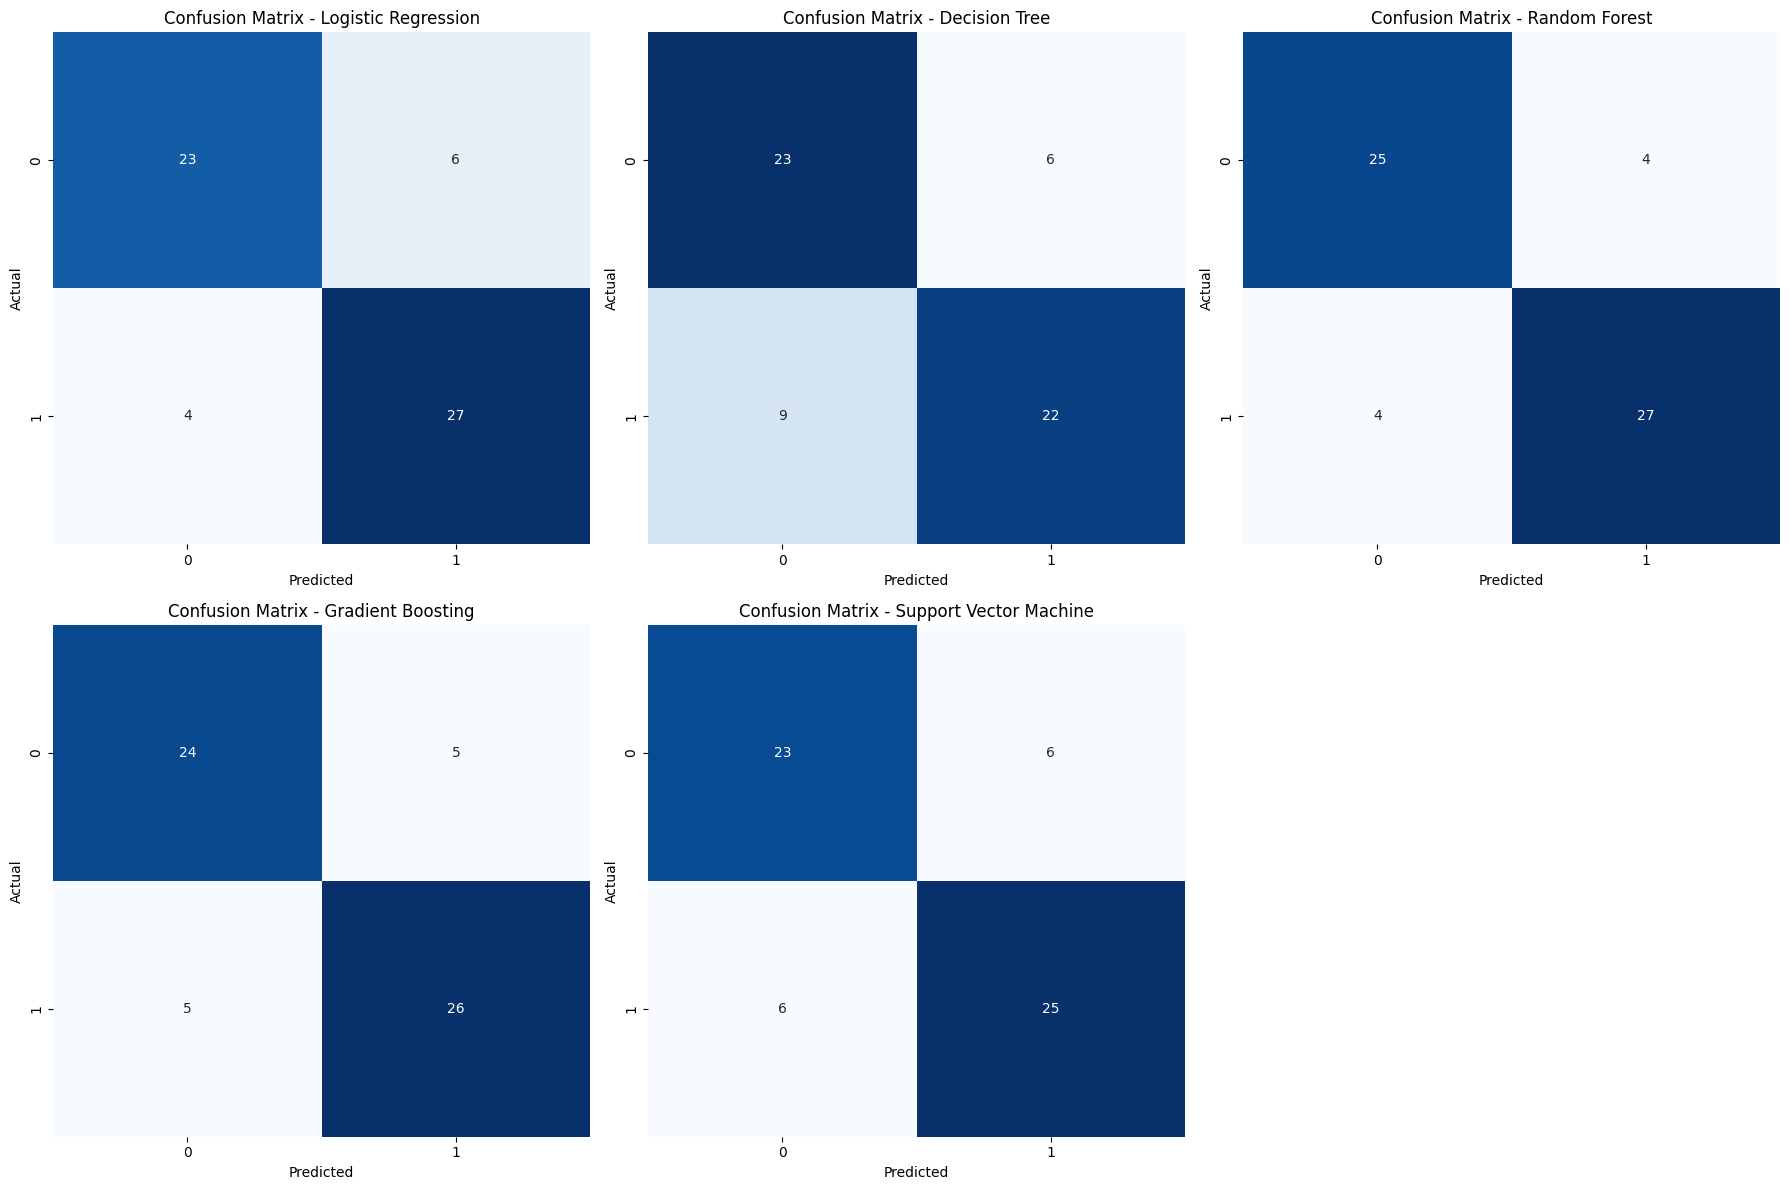

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.833333,0.818182,0.870968,0.843750,"[[23, 6], [4, 27]]"
1,Decision Tree,0.750000,0.785714,0.709677,0.745763,"[[23, 6], [9, 22]]"
2,Random Forest,0.866667,0.870968,0.870968,0.870968,"[[25, 4], [4, 27]]"
3,Gradient Boosting,0.833333,0.838710,0.838710,0.838710,"[[24, 5], [5, 26]]"
4,Support Vector Machine,0.800000,0.806452,0.806452,0.806452,"[[23, 6], [6, 25]]"


In [ ]:
#Treinando com RUS
X_Balan = Pred_Balanc1.drop('Churn', axis=1)
y_Balan = Pred_Balanc1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_Balan, y_Balan, test_size=0.2, random_state=42)
# Inicializando os modelos
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Treinando e avaliando os modelos
results = []

plt.figure(figsize=(18, 12))

for i, (model_name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    })

    # Plotando a matriz de confusão
    plt.subplot(2, 3, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Convertendo os resultados para um DataFrame
results_df = pd.DataFrame(results)

# Exibir os resultados
results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generating learning curve for Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 cl

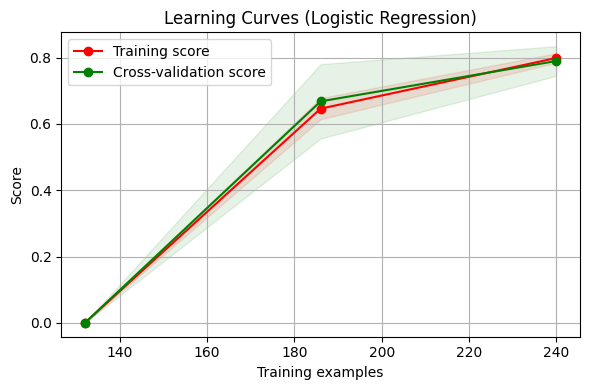

Generating learning curve for Decision Tree


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueErr

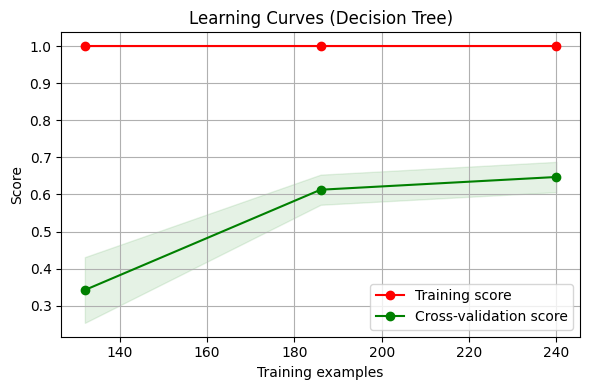

Generating learning curve for Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueErr

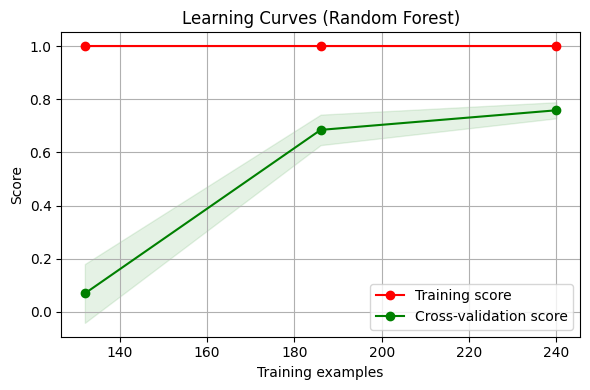

Generating learning curve for Gradient Boosting


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weight=None)
  File "/usr/local/lib/python3.10/dist-

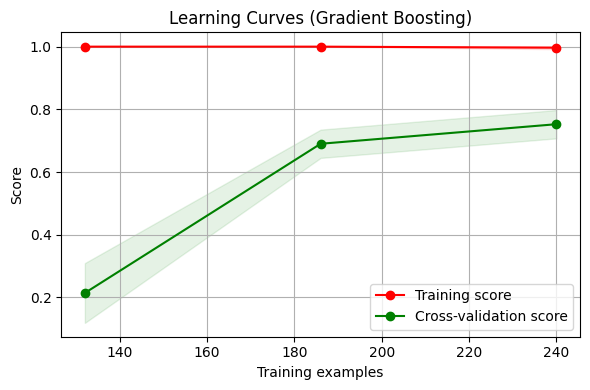

Generating learning curve for Support Vector Machine


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 206, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

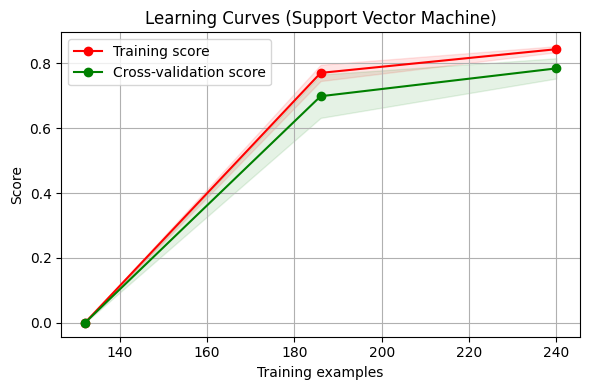

In [ ]:
# Função para plotar a curva de aprendizado do RANDOM UNDER SAMPLING
def plot_learning_curve(estimator, title, cv, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_Balan, y_Balan, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Utilizando os modelos do seu dicionário de modelos
cv = StratifiedKFold(n_splits=5)

for model_name, model in models.items():
    print(f"Generating learning curve for {model_name}")
    plot_learning_curve(model, f"Learning Curves ({model_name})", cv=cv)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


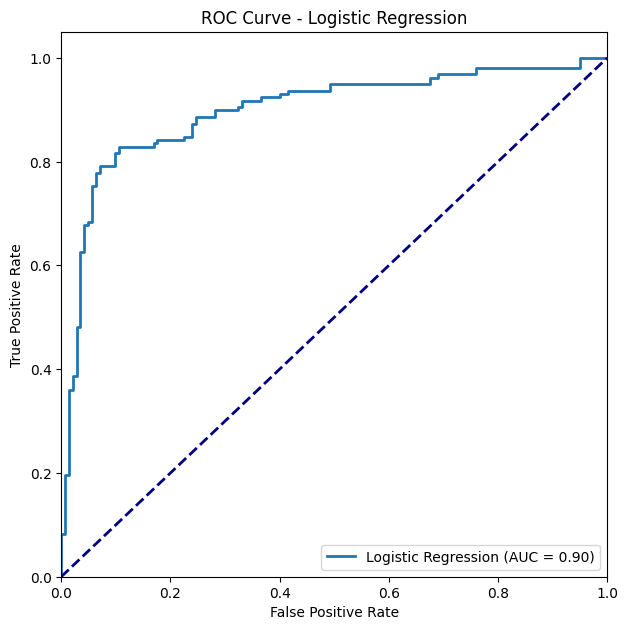

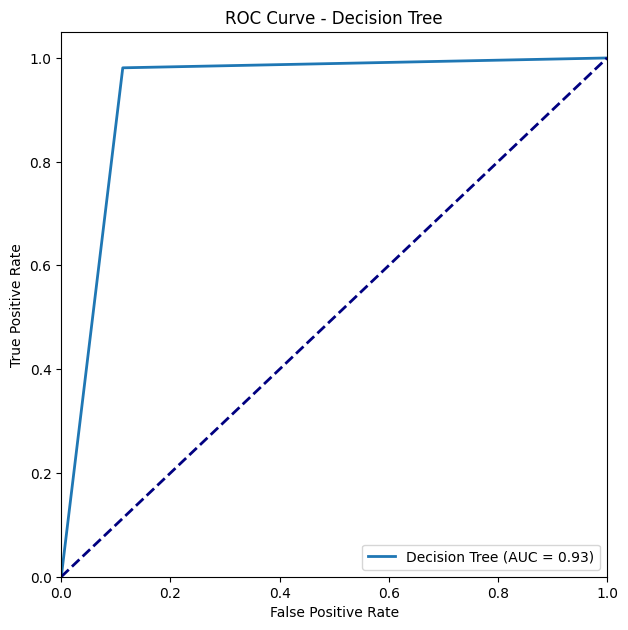

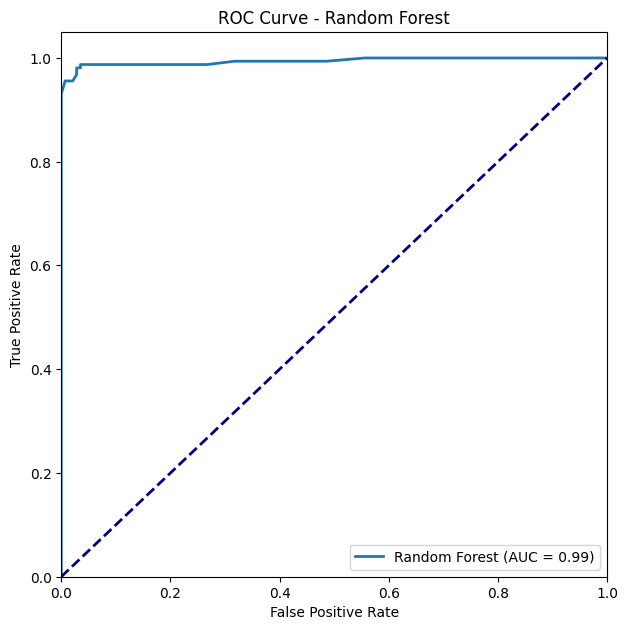

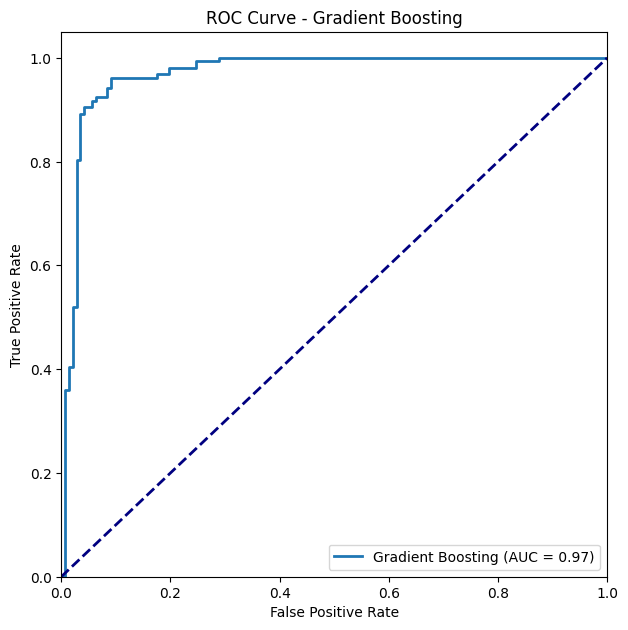

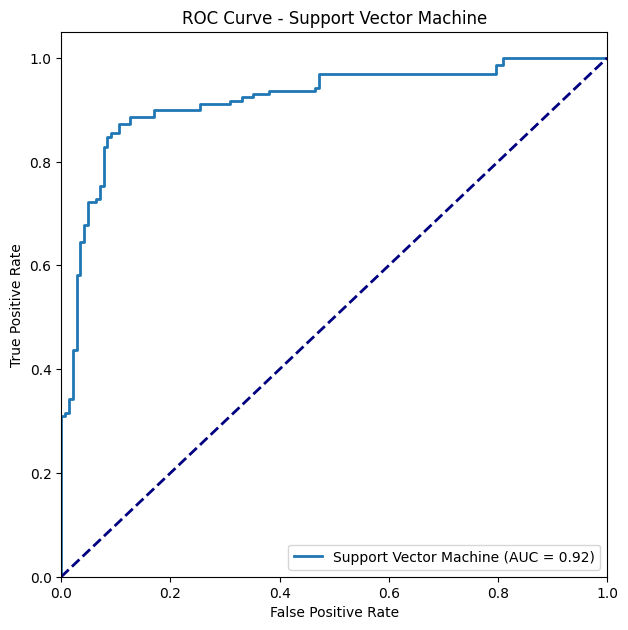

In [ ]:
#Treinando com RANDOM OVER SAMPLING
X_Balan2 = Pred_Balanc2.drop('Churn', axis=1)
y_Balan2 = Pred_Balanc2['Churn']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_Balan2, y_Balan2, test_size=0.2, random_state=42)
# Inicializando os modelos
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Treinando e avaliando os modelos
results = []

for model_name, model in models.items():
    model.fit(X_train1, y_train1)
    y_pred1 = model.predict(X_test1)

    accuracy = accuracy_score(y_test1, y_pred1)
    precision = precision_score(y_test1, y_pred1)
    recall = recall_score(y_test1, y_pred1)
    f1 = f1_score(y_test1, y_pred1)
    conf_matrix = confusion_matrix(y_test1, y_pred1)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    })
 # Calcular a curva ROC e AUC
    if hasattr(model, "predict_proba"):
        y_prob1 = model.predict_proba(X_test1)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob1 = model.decision_function(X_test1)
    else:
        continue

    fpr, tpr, _ = roc_curve(y_test1, y_prob1)
    roc_auc = auc(fpr, tpr)

    # Plotar curva ROC
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 3, i)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")


plt.tight_layout()
plt.show()



In [ ]:
#MÉTRICAS PARA TREINAMENTO COM RANDOM OVER SAMPLING
results_df1 = pd.DataFrame(results)

# Exibir os resultados
results_df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.856667,0.902098,0.816456,0.857143,"[[128, 14], [29, 129]]"
1,Decision Tree,0.936667,0.906433,0.981013,0.942249,"[[126, 16], [3, 155]]"
2,Random Forest,0.973333,0.962963,0.987342,0.975000,"[[136, 6], [2, 156]]"
3,Gradient Boosting,0.926667,0.935897,0.924051,0.929936,"[[132, 10], [12, 146]]"
4,Support Vector Machine,0.880000,0.912162,0.854430,0.882353,"[[129, 13], [23, 135]]"


In [ ]:
# Guardando o modelo Random Forest treinado
rf_model = models["Random Forest"]

# Importância das características
feature_importances = rf_model.feature_importances_
features = X_Balan2.columns

# Criando um DataFrame para exibir as importâncias
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Ordenar por importância
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Exibir as importâncias das características
feature_importances_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Feature,Importance
4,Num_Sites,0.396159
3,Years,0.148848
1,Total_Purchase,0.093668
6,Company_Num,0.091529
5,State_Num,0.088951
7,DATE_Num,0.080684
0,Age,0.078959
2,Account_Manager,0.021201


In [ ]:
rf_params = rf_model.get_params()
rf_params


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


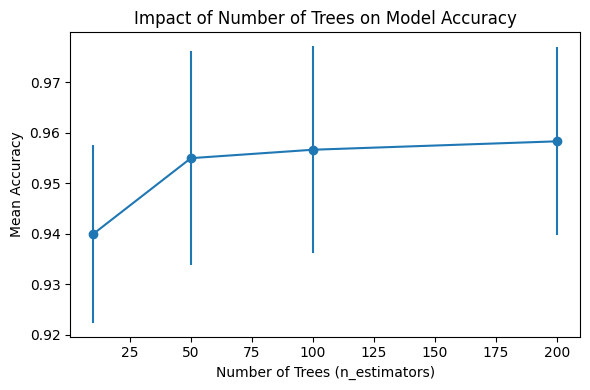

,n_estimators,mean_accuracy,std_accuracy
0,10,0.940000,0.017599
1,50,0.955000,0.021148
2,100,0.956667,0.020514
3,200,0.958333,0.018634


In [ ]:
n_estimators_list = [10, 50, 100, 200]
results = []

for n_estimators in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_model, X_train1, y_train1, cv=5, scoring='accuracy')
    results.append({
        'n_estimators': n_estimators,
        'mean_accuracy': scores.mean(),
        'std_accuracy': scores.std()
    })

results_df = pd.DataFrame(results)

# Plotando os resultados
plt.errorbar(results_df['n_estimators'], results_df['mean_accuracy'], yerr=results_df['std_accuracy'], fmt='-o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Accuracy')
plt.title('Impact of Number of Trees on Model Accuracy')
plt.show()

# Exibindo os resultados
results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generating learning curve for Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 clas

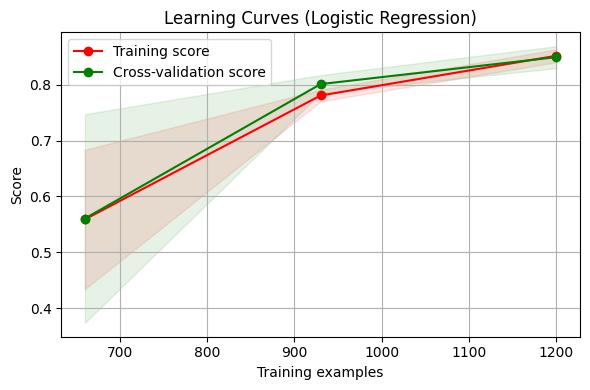

Generating learning curve for Decision Tree


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueErr

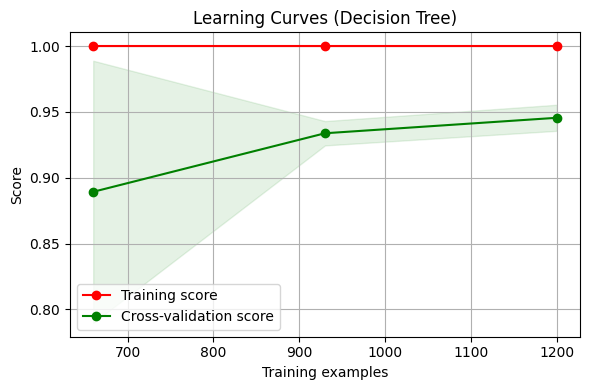

Generating learning curve for Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueErr

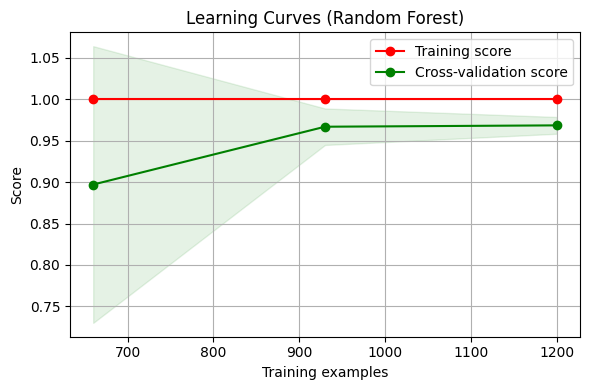

Generating learning curve for Gradient Boosting


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weight=None)
  File "/usr/local/lib/python3.10/dist-pa

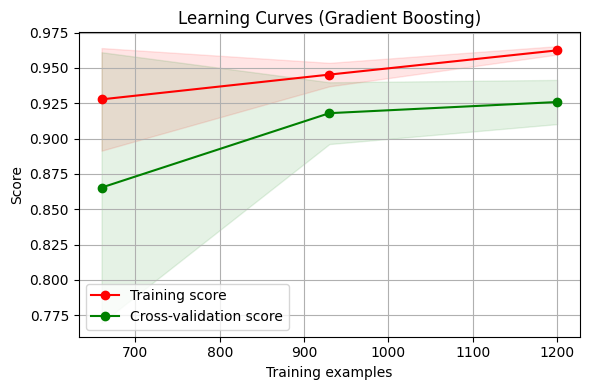

Generating learning curve for Support Vector Machine


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 206, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/sv

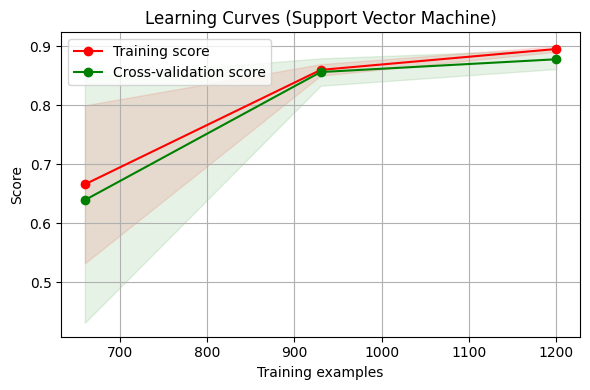

In [ ]:
# Função para plotar a curva de aprendizado do RANDOM OVER SAMPLING
def plot_learning_curve(estimator, title, cv, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_Balan2, y_Balan2, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Utilizando os modelos do seu dicionário de modelos
cv = StratifiedKFold(n_splits=5)

for model_name, model in models.items():
    print(f"Generating learning curve for {model_name}")
    plot_learning_curve(model, f"Learning Curves ({model_name})", cv=cv)
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Avaliar cada modelo usando validação cruzada
cv = StratifiedKFold(n_splits=5)

for model_name, model in models.items():
    print(f"Cross-validation for {model_name}")
    cv_scores = cross_val_score(model, X_Balan2, y_Balan2, cv=cv, scoring='f1')
    print(f"{model_name} Cross-validation F1 scores: {cv_scores}")
    print(f"{model_name} Mean cross-validation F1 score: {np.mean(cv_scores)}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validation for Logistic Regression
Logistic Regression Cross-validation F1 scores: [0.81553398 0.87459807 0.86092715 0.84563758 0.85135135]
Logistic Regression Mean cross-validation F1 score: 0.8496096277767847

Cross-validation for Decision Tree
Decision Tree Cross-validation F1 scores: [0.92744479 0.95238095 0.95541401 0.94339623 0.94936709]
Decision Tree Mean cross-validation F1 score: 0.9456006150190353

Cross-validation for Random Forest
Random Forest Cross-validation F1 scores: [0.95176849 0.9771987  0.96463023 0.98039216 0.96774194]
Random Forest Mean cross-validation F1 score: 0.9683463006482773

Cross-validation for Gradient Boosting
Gradient Boosting Cross-validation F1 scores: [0.89873418 0.92651757 0.92307692 0.94533762 0.93589744]
Gradient Boosting Mean cross-validation F1 score: 0.9259127457306622

Cross-validation for Support Vector Machine
Support Vector Machine Cross-validation F1 scores: [0.86084142 0.89240506 0.85897436 0.87868852 0.90066225]
Support Vector Mac

In [ ]:
#Treinando com OVER SAMPLING smote
X_Balan3 = Pred_Balanc3.drop('Churn', axis=1)
y_Balan3 = Pred_Balanc3['Churn']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Balan3, y_Balan3, test_size=0.2, random_state=42)
# Inicializando os modelos
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Treinando e avaliando os modelos
results = []

for model_name, model in models.items():
    model.fit(X_train2, y_train2)
    y_pred2 = model.predict(X_test2)

    accuracy = accuracy_score(y_test2, y_pred2)
    precision = precision_score(y_test2, y_pred2)
    recall = recall_score(y_test2, y_pred2)
    f1 = f1_score(y_test2, y_pred2)
    conf_matrix = confusion_matrix(y_test2, y_pred2)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    })

# Convertendo os resultados para um DataFrame
results_df2 = pd.DataFrame(results)

# Exibir os resultados
results_df2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.863333,0.897959,0.835443,0.865574,"[[127, 15], [26, 132]]"
1,Decision Tree,0.880000,0.906667,0.860759,0.883117,"[[128, 14], [22, 136]]"
2,Random Forest,0.953333,0.967532,0.943038,0.955128,"[[137, 5], [9, 149]]"
3,Gradient Boosting,0.936667,0.966443,0.911392,0.938111,"[[137, 5], [14, 144]]"
4,Support Vector Machine,0.900000,0.900000,0.911392,0.905660,"[[126, 16], [14, 144]]"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generating learning curve for Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 clas

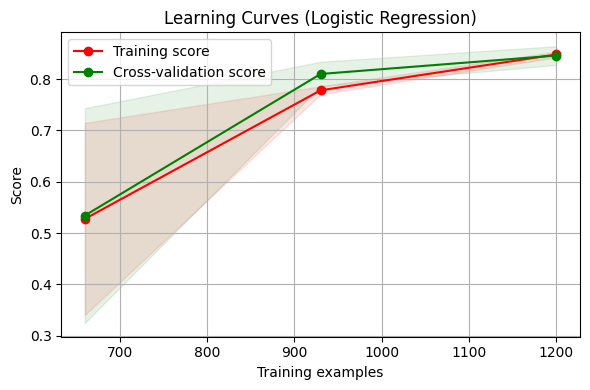

Generating learning curve for Decision Tree


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueErr

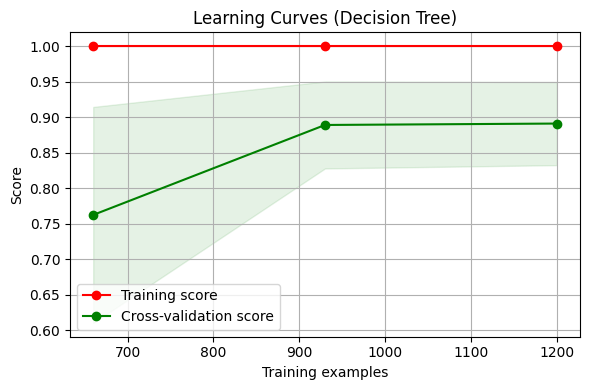

Generating learning curve for Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueErr

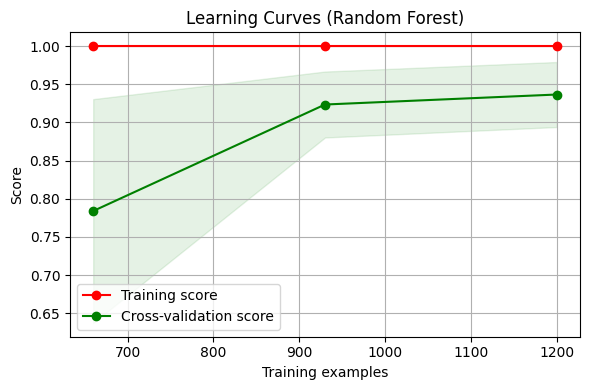

Generating learning curve for Gradient Boosting


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weight=None)
  File "/usr/local/lib/python3.10/dist-pa

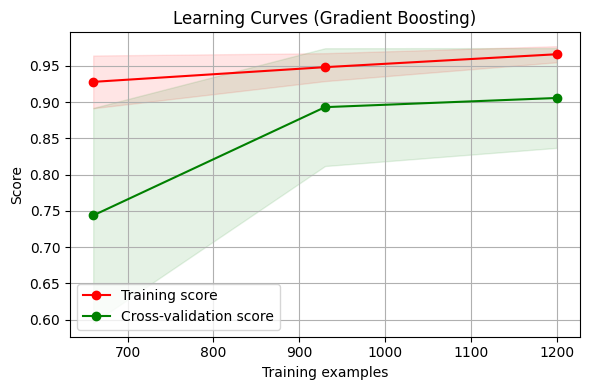

Generating learning curve for Support Vector Machine


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 206, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/sv

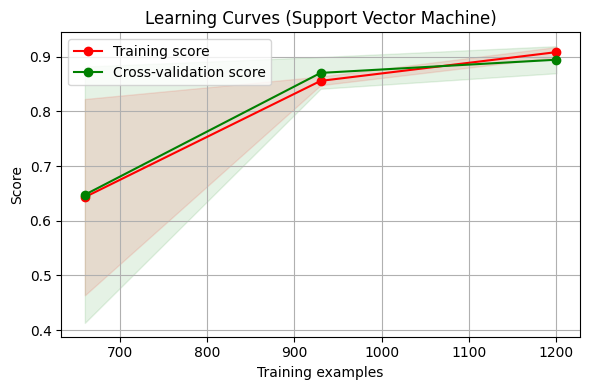

In [ ]:
# Função para plotar a curva de aprendizado do  OVER SAMPLING SMOTE
def plot_learning_curve(estimator, title, cv, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_Balan3, y_Balan3, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Utilizando os modelos do seu dicionário de modelos
cv = StratifiedKFold(n_splits=5)

for model_name, model in models.items():
    print(f"Generating learning curve for {model_name}")
    plot_learning_curve(model, f"Learning Curves ({model_name})", cv=cv)
    plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


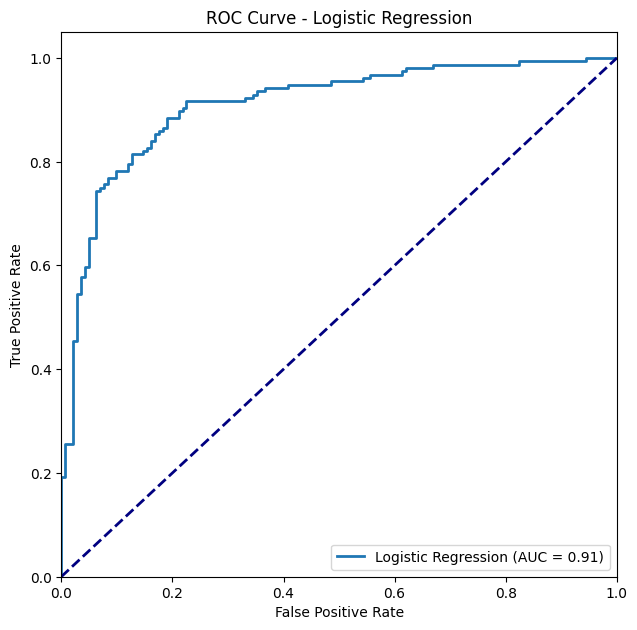

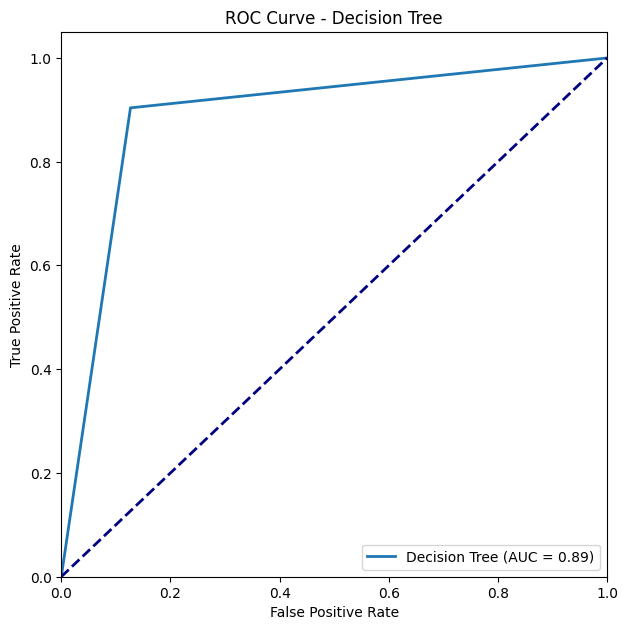

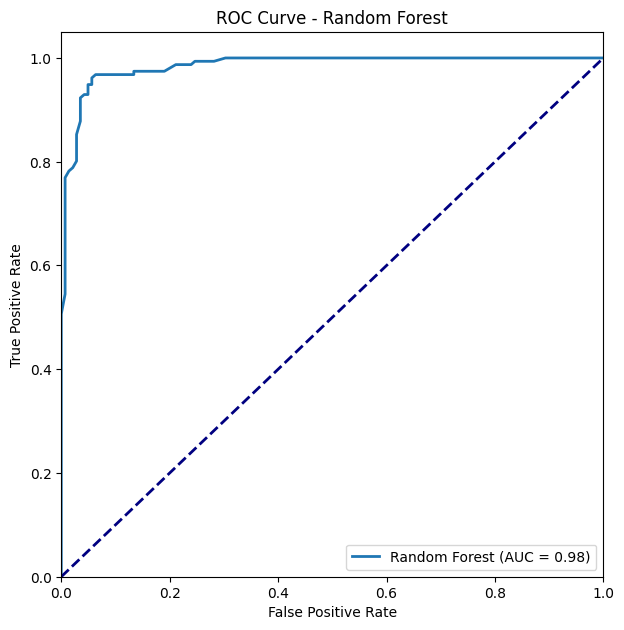

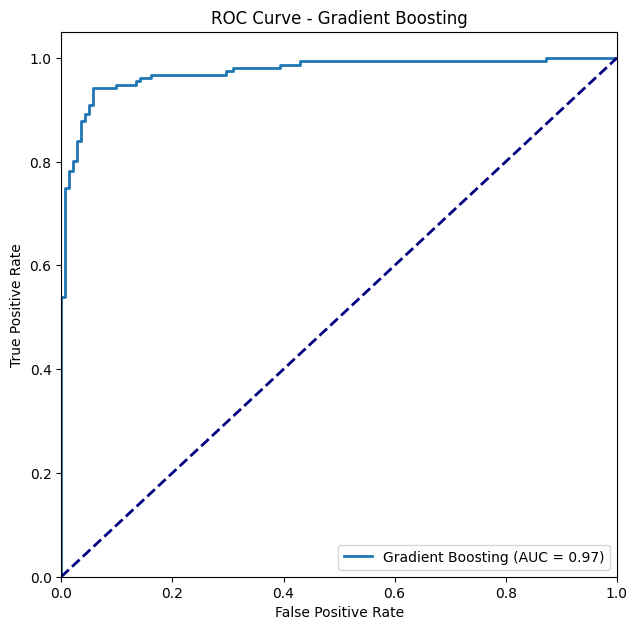

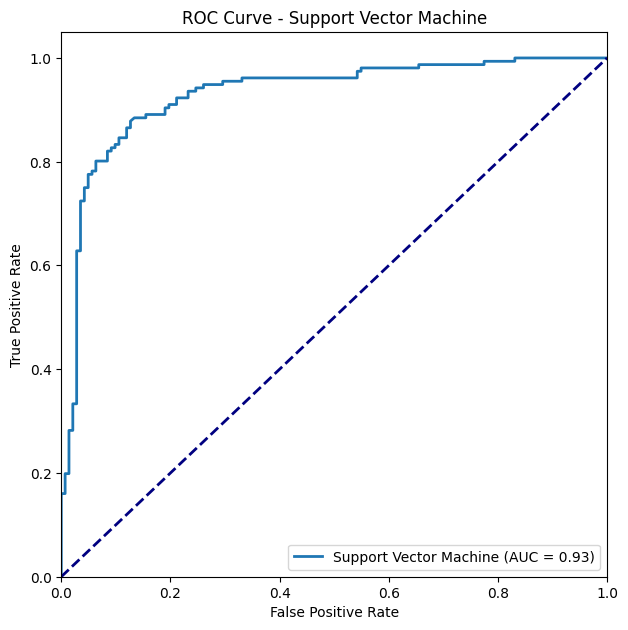

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.835570,0.863946,0.814103,0.838284,"[[122, 20], [29, 127]]"
1,Decision Tree,0.889262,0.886792,0.903846,0.895238,"[[124, 18], [15, 141]]"
2,Random Forest,0.946309,0.948718,0.948718,0.948718,"[[134, 8], [8, 148]]"
3,Gradient Boosting,0.922819,0.952381,0.897436,0.924092,"[[135, 7], [16, 140]]"
4,Support Vector Machine,0.875839,0.878981,0.884615,0.881789,"[[123, 19], [18, 138]]"
5,Logistic Regression,0.835570,0.863946,0.814103,0.838284,"[[122, 20], [29, 127]]"
6,Decision Tree,0.889262,0.886792,0.903846,0.895238,"[[124, 18], [15, 141]]"
7,Random Forest,0.946309,0.948718,0.948718,0.948718,"[[134, 8], [8, 148]]"
8,Gradient Boosting,0.922819,0.952381,0.897436,0.924092,"[[135, 7], [16, 140]]"
9,Support Vector Machine,0.875839,0.878981,0.884615,0.881789,"[[123, 19], [18, 138]]"


In [ ]:
#Treinando com OVER SAMPLING ADASYN
X_Balan4 = Pred_Balanc4.drop('Churn', axis=1)
y_Balan4 = Pred_Balanc4['Churn']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_Balan4, y_Balan4, test_size=0.2, random_state=42)
# Inicializando os modelos
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Treinando e avaliando os modelos
results = []

for model_name, model in models.items():
    model.fit(X_train4, y_train4)
    y_pred4 = model.predict(X_test4)

    accuracy = accuracy_score(y_test4, y_pred4)
    precision = precision_score(y_test4, y_pred4)
    recall = recall_score(y_test4, y_pred4)
    f1 = f1_score(y_test4, y_pred4)
    conf_matrix = confusion_matrix(y_test4, y_pred4)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    })

# Plotando curvas ROC para cada modelo
for i, (model_name, model) in enumerate(models.items(), 1):
    # Treinar o modelo
    model.fit(X_train4, y_train4)
    y_pred4 = model.predict(X_test4)

    # Calcular métricas de desempenho
    accuracy = accuracy_score(y_test4, y_pred4)
    precision = precision_score(y_test4, y_pred4)
    recall = recall_score(y_test4, y_pred4)
    f1 = f1_score(y_test4, y_pred4)
    conf_matrix = confusion_matrix(y_test4, y_pred4)

    # Adicionar resultados ao DataFrame
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    })

    # Calcular a curva ROC e AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test4)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test4)
    else:
        continue

    fpr, tpr, _ = roc_curve(y_test4, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plotar curva ROC
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 3, i)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")


plt.tight_layout()
plt.show()

# Convertendo os resultados para um DataFrame
results_df3 = pd.DataFrame(results)

# Exibir os resultados
results_df3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


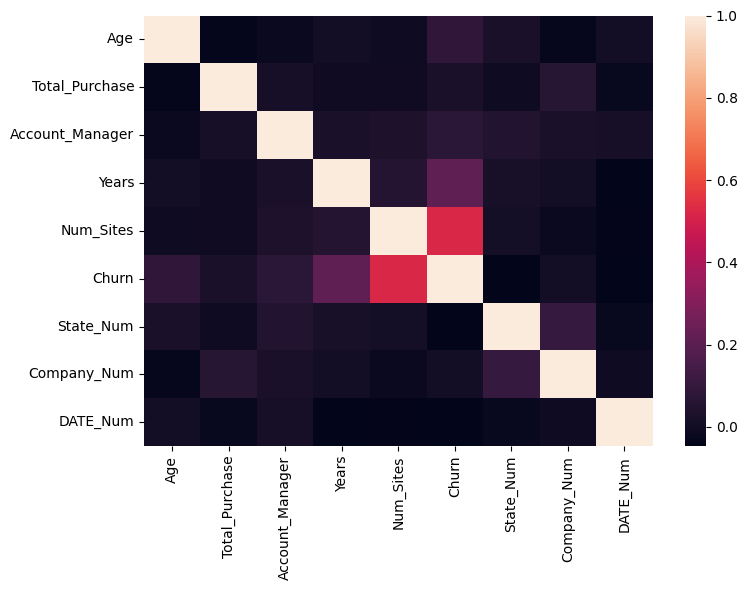

In [ ]:
# Plotar matriz de correlação
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(Pred_Churn2.corr())

plt.show();

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


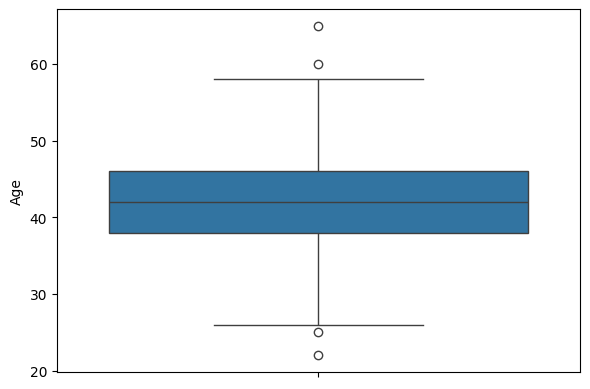

In [ ]:
#OUTLIERS
plt.rcParams['figure.figsize'] = [6.00,4.00]
plt.rcParams['figure.autolayout'] = True
sns.boxplot(data = Pred_Churn2, y = Pred_Churn2['Age'] )
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


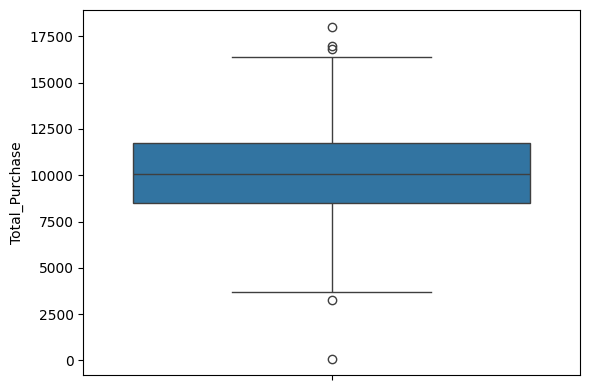

In [ ]:
#OUTLIERS
plt.rcParams['figure.figsize'] = [6.00,4.00]
plt.rcParams['figure.autolayout'] = True
sns.boxplot(data = Pred_Churn2, y = Pred_Churn2['Total_Purchase'] )
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


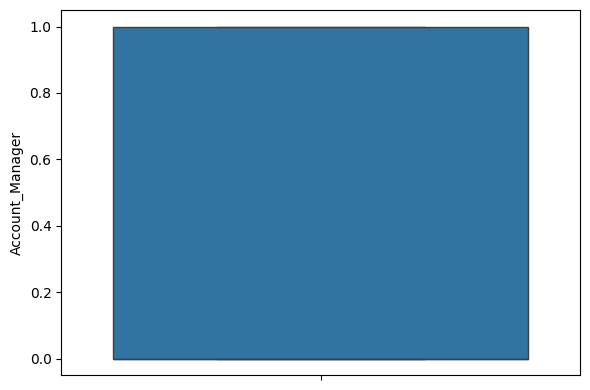

In [ ]:
#NÃO OUTLIERS
plt.rcParams['figure.figsize'] = [6.00,4.00]
plt.rcParams['figure.autolayout'] = True
sns.boxplot(data = Pred_Churn2, y = Pred_Churn2['Account_Manager'] )
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


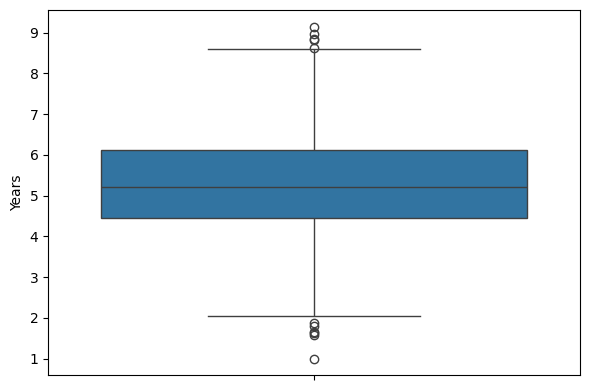

In [ ]:
#OUTLIERS
plt.rcParams['figure.figsize'] = [6.00,4.00]
plt.rcParams['figure.autolayout'] = True
sns.boxplot(data = Pred_Churn2, y = Pred_Churn2['Years'] )
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


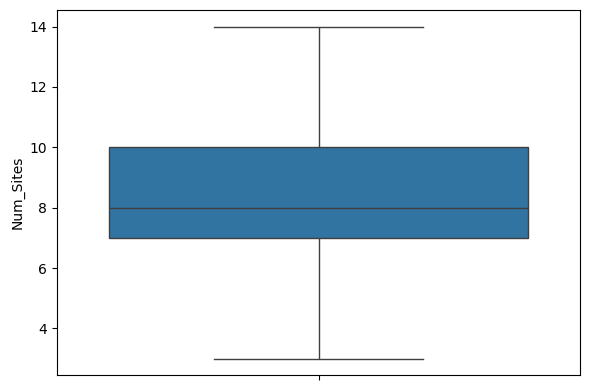

In [ ]:
#NÃO OUTLIERS
plt.rcParams['figure.figsize'] = [6.00,4.00]
plt.rcParams['figure.autolayout'] = True
sns.boxplot(data = Pred_Churn2, y = Pred_Churn2['Num_Sites'] )
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


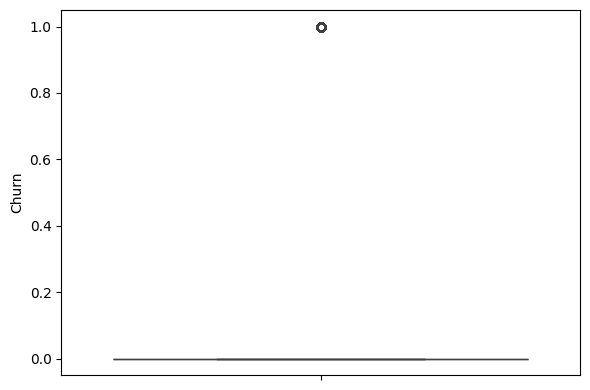

In [ ]:
#OUTLIERS??( CLASSE DESBALANCEADA)
plt.rcParams['figure.figsize'] = [6.00,4.00]
plt.rcParams['figure.autolayout'] = True
sns.boxplot(data = Pred_Churn2, y = Pred_Churn2['Churn'] )
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


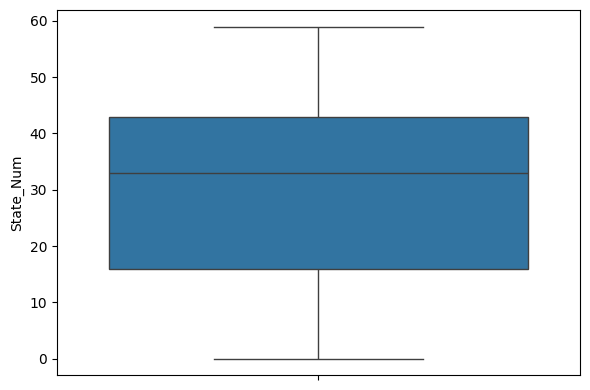

In [ ]:
#NÃO OUTLIERS
plt.rcParams['figure.figsize'] = [6.00,4.00]
plt.rcParams['figure.autolayout'] = True
sns.boxplot(data = Pred_Churn2, y = Pred_Churn2['State_Num'] )
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


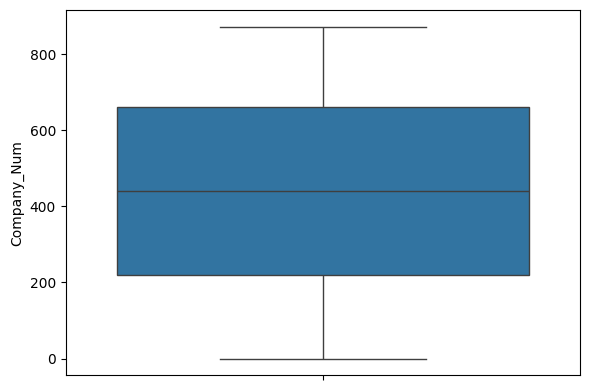

In [ ]:
#NÃO OUTLIERS
plt.rcParams['figure.figsize'] = [6.00,4.00]
plt.rcParams['figure.autolayout'] = True
sns.boxplot(data = Pred_Churn2, y = Pred_Churn2['Company_Num'] )
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


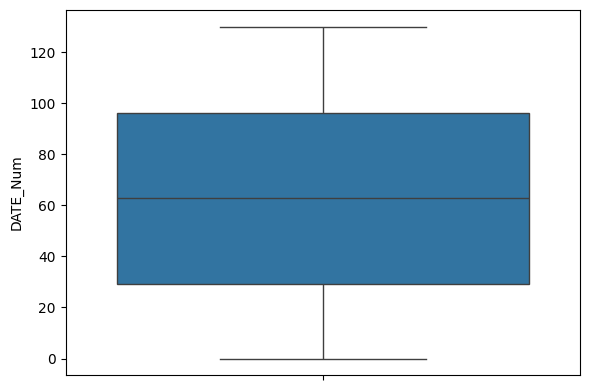

In [ ]:
#NÃO OUTLIERS
plt.rcParams['figure.figsize'] = [6.00,4.00]
plt.rcParams['figure.autolayout'] = True
sns.boxplot(data = Pred_Churn2, y = Pred_Churn2['DATE_Num'] )
plt.show()

In [ ]:
# Salvar o modelo Random Forest treinado em um arquivo
joblib.dump(rf_model, 'rf_model_trained.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Carregar o modelo salvo
rf_model_loaded = joblib.load('rf_model_trained.pkl')
print("Modelo Random Forest carregado com sucesso!")



Modelo Random Forest carregado com sucesso!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def normalizar_novos_dados(novos_dados_brutos, scaler):
    return pd.DataFrame(scaler.transform(novos_dados_brutos), columns=novos_dados_brutos.columns)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(type(rf_model_loaded))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if hasattr(rf_model_loaded, 'n_estimators'):
    print("Modelo carregado corretamente!")
else:
    print("O modelo não foi treinado ou não foi carregado corretamente.")

Modelo carregado corretamente!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import os
print(os.listdir())  # Verifica todos os arquivos no diretório atual


['.config', 'rf_model_trained.pkl', 'drive', 'random_forest_model.pkl', 'sample_data']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Carregar o modelo salvo
rf_model_loaded = joblib.load('rf_model_trained.pkl')

# Verificar se o modelo foi carregado corretamente
print(rf_model_loaded)

RandomForestClassifier(n_estimators=200, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Entrada manual dos dados para o cliente
idade = float(input("Idade: "))
gasto_total = float(input("Gasto Total: "))
gerente_conta = int(input("Gerente de Conta (0 = Não, 1 = Sim): "))
anos_cliente = float(input("Anos como cliente: "))
num_sites = int(input("Número de Sites: "))
estado_num = int(input("Número do Estado: "))
empresa_num = int(input("Número da Empresa: "))
dia_num = int(input("Número do Dia: "))

# Criar DataFrame com os dados inseridos manualmente
novos_dados_brutos = pd.DataFrame({
    'Age': [idade],
    'Total_Purchase': [gasto_total],
    'Account_Manager': [gerente_conta],
    'Years': [anos_cliente],
    'Num_Sites': [num_sites],
    'State_Num': [estado_num],
    'Company_Num': [empresa_num],
    'DATE_Num': [dia_num]
})

# Remover a coluna 'Churn' do conjunto de dados de treinamento (se presente)
# (Aqui você já deve ter carregado o conjunto Pred_Churn2 antes de usar este código)
Pred_Churn2_sem_Churn = Pred_Churn2.drop(columns=['Churn'], errors='ignore')

# Normalizar os dados de treinamento sem a variável 'Churn'
scaler_minMax1 = MinMaxScaler()
Pred_ChurnNormnovo = pd.DataFrame(scaler_minMax1.fit_transform(Pred_Churn2_sem_Churn), columns=Pred_Churn2_sem_Churn.columns)

# Normalizar os dados de entrada sem a variável 'Churn'
novos_dados_normalizados = pd.DataFrame(scaler_minMax1.transform(novos_dados_brutos), columns=novos_dados_brutos.columns)

# Exibir os dados normalizados
print("\nDados normalizados:")
print(novos_dados_normalizados)

# Verificar se o modelo está treinado
try:
    # Realizar a predição com o modelo Random Forest
    probabilidades = rf_model_loaded.predict_proba(novos_dados_normalizados)

    # Exibir as probabilidades de cada classe (Churn = 1, Não Churn = 0)
    print("\nProbabilidade de Churn (irá cancelar): {:.2f}%".format(probabilidades[0][1] * 100))
    print("Probabilidade de Não Churn (não irá cancelar): {:.2f}%".format(probabilidades[0][0] * 100))

    # Predição final (a classe com a maior probabilidade)
    predicao = rf_model_loaded.predict(novos_dados_normalizados)

    # Exibir o resultado da predição
    if predicao[0] == 1:
        print("\nO cliente será classificado como Churn (irá cancelar).")
    else:
        print("\nO cliente será classificado como Não Churn (não irá cancelar).")

except Exception as e:
    print(f"Erro durante a predição: {e}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Idade: 40
Gasto Total: 11000
Gerente de Conta (0 = Não, 1 = Sim): 1
Anos como cliente: 7
Número de Sites: 10
Número do Estado: 5
Número da Empresa: 5
Número do Dia: 5

Dados normalizados:
        Age  Total_Purchase  Account_Manager     Years  Num_Sites  State_Num  \
0  0.418605        0.608055              1.0  0.736196   0.636364   0.084746   

   Company_Num  DATE_Num  
0     0.005734  0.038462  
Erro durante a predição: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
